# BAIS 6040 Data Programming in Python

## Spring 2021

## Week 9 Homework
## Group 3: Jared Barkley, Tyler Zaruba, Netaji Boggarapu, Michael Noonan

##Uses Michael's prework to get everything loaded the same. Keeps the Linear Regression (LR),
##as a base. Gets predictive values for Ridge and Lasso. Graphs are available

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [671]:
# compiledcountydata_dir = "https://raw.githubusercontent.com/jaredbarkley0/PythonGroupProject/master/MN%20County%20Data_032021.csv"
compiledcountydata_dir = "https://raw.githubusercontent.com/jaredbarkley0/PythonGroupProject/master/MN%20County%20Data_032721.csv"
compiledcountydata = pd.read_csv(compiledcountydata_dir)
compiledcountydata.head(10)

,Unnamed: 0,County,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home
0,0,Aitkin,1191,33,15870.0,0.075047,8.0,2.097233,254.0,118.0,4.0,0.099076,29.500000
1,1,Anoka,33391,390,362648.0,0.092076,753.9,2.712716,3753.0,1675.0,35.0,0.050163,47.857143
2,2,Becker,3131,42,34545.0,0.090635,22.8,2.393929,477.0,294.0,8.0,0.093900,36.750000
3,3,Beltrami,3386,51,47184.0,0.071762,14.8,2.487013,1990.0,264.0,11.0,0.077968,24.000000
4,4,Benton,4482,90,40895.0,0.109598,94.4,2.426614,1050.0,557.0,11.0,0.124275,50.636364
5,5,Big Stone,516,3,4993.0,0.103345,9.8,2.170764,137.0,41.0,4.0,0.079457,10.250000
6,6,Blue Earth,5983,35,68583.0,0.087237,84.5,2.380168,4159.0,438.0,19.0,0.073207,23.052632
7,7,Brown,2461,37,25119.0,0.097974,41.3,2.196598,1097.0,302.0,11.0,0.122714,27.454545
8,8,Carlton,3001,49,35935.0,0.083512,40.5,2.452634,1993.0,198.0,10.0,0.065978,19.800000
9,9,Carver,7798,40,107179.0,0.072757,250.5,2.765845,918.0,339.0,17.0,0.043473,19.941176


In [672]:
#Cook County has 0 longterm care facilities, but we want to keep in our regression model
#Fill NaN values for all facility-related data points with 0, which is an equivalent value in this case

fillfacilitiesdata = {'Casesinfacility':0,'FacilitiesinCounty':0,'Percent Cases in Facilities':0,'Cases per number of Facilities':0}

compiledcountydata.fillna(fillfacilitiesdata, inplace=True)

In [673]:
compiledcountydata

,Unnamed: 0,County,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home
0,0,Aitkin,1191,33,15870.0,0.075047,8.0,2.097233,254.0,118.0,4.0,0.099076,29.500000
1,1,Anoka,33391,390,362648.0,0.092076,753.9,2.712716,3753.0,1675.0,35.0,0.050163,47.857143
2,2,Becker,3131,42,34545.0,0.090635,22.8,2.393929,477.0,294.0,8.0,0.093900,36.750000
3,3,Beltrami,3386,51,47184.0,0.071762,14.8,2.487013,1990.0,264.0,11.0,0.077968,24.000000
4,4,Benton,4482,90,40895.0,0.109598,94.4,2.426614,1050.0,557.0,11.0,0.124275,50.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,Watonwan,1176,8,10923.0,0.107663,25.4,2.397507,151.0,36.0,3.0,0.030612,12.000000
83,83,Wilkin,677,11,6226.0,0.108738,8.7,2.238850,152.0,36.0,2.0,0.053176,18.000000
84,84,Winona,4193,49,50830.0,0.082491,79.9,2.352632,3855.0,277.0,9.0,0.066062,30.777778
85,85,Wright,12554,116,138531.0,0.090622,178.3,2.796739,1158.0,687.0,20.0,0.054724,34.350000


In [674]:
compiledcountydata.iloc[86]

Unnamed: 0                                       86
County                              Yellow Medicine
Total Positive Cases                            977
Total Deaths                                     17
Population                                     9729
Rate of Infection                          0.100421
Pop Density                                    13.4
Mean Household Size                         2.28254
Congregate Living Population                    293
No. of Cases in Nursing Homes                    79
No. of Nursing Homes in County                    3
Nursing Home Cases, % of Total            0.0808598
Cases per number of Nursing Home            26.3333
Name: 86, dtype: object

In [675]:
#Cases of unknown or missing county information do not need to be included, drop this column
#Could DropNA since this is the only row with NA values, but dropping by index for practice

compiledcountydata.drop([86],inplace=True)

In [676]:
# confirming no null data remains

compiledcountydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        86 non-null     int64  
 1   County                            86 non-null     object 
 2   Total Positive Cases              86 non-null     int64  
 3   Total Deaths                      86 non-null     int64  
 4   Population                        86 non-null     float64
 5   Rate of Infection                 86 non-null     float64
 6   Pop Density                       86 non-null     float64
 7   Mean Household Size               86 non-null     float64
 8   Congregate Living Population      86 non-null     float64
 9   No. of Cases in Nursing Homes     86 non-null     float64
 10  No. of Nursing Homes in County    86 non-null     float64
 11  Nursing Home Cases, % of Total    86 non-null     float64
 12  Cases per 

In [677]:
# Assign columns of interest and target value

columns = ["Total Positive Cases","Population", "Rate of Infection", "Congregate Living Population","No. of Cases in Nursing Homes","No. of Nursing Homes in County","Cases per number of Nursing Home"]
# fillfacilitiesdata = {'Casesinfacility':0,'FacilitiesinCounty':0,'Percent Cases in Facilities':0,'Cases per number of Facilities':0}
target = "Total Deaths"

X = compiledcountydata[columns]
y = compiledcountydata[target]

In [678]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [679]:
X_Plot = X["Population"]
X_Plot

0      15870.0
1     362648.0
2      34545.0
3      47184.0
4      40895.0
        ...   
81    262748.0
82     10923.0
83      6226.0
84     50830.0
85    138531.0
Name: Population, Length: 86, dtype: float64

In [680]:
#assign a variable to call linear regression function
lr = LinearRegression(fit_intercept=False)
lr

LinearRegression(fit_intercept=False)

In [681]:
lr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [682]:
lr.score(X_train, y_train)  # What's our score with the training data set?

0.9855621779594815

In [683]:
lr.score(X_test, y_test)

0.986827012063956

In [684]:
# lr.score(X_test, y_test)    # What's our score with the test data set?

## LR Metrics

In [685]:
import math
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error

def printMetrics(test, predictions):
    print(f"Score: {explained_variance_score(test, predictions):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(test, predictions):.2f}")
    print(f"Mean Squared Error: {math.sqrt(mean_squared_error(test, predictions)):.2f}")
    print(f"r2: {r2_score(test, predictions):.2f}")
    print(f"Reg Fit: {lr.score(X_test, y_test):.2f}")

In [686]:
predictions = lr.predict(X_test)
printMetrics(y_test, predictions)

Score: 0.99
Mean Absolute Error: 17.48
Mean Squared Error: 40.80
r2: 0.99
Reg Fit: 0.99


In [687]:
# X_test["Total Positive Cases"]

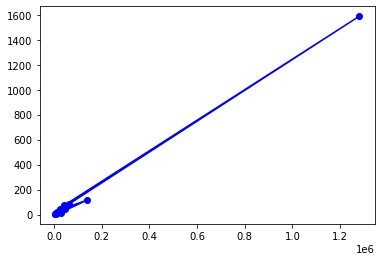

In [688]:
y_pred = lr.predict(X_test)
plt.scatter(X_test["Population"], y_test, color ='b')
plt.plot(X_test["Population"], y_test, color ='blue')
plt.show()

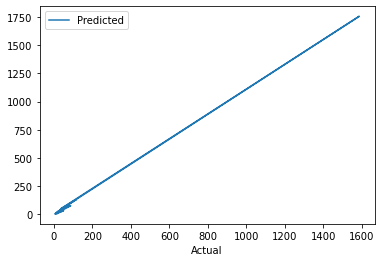

In [689]:
# To verify Predicted VS Actual
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df.plot(x='Actual', y='Predicted', kind = 'line')
plt.show()

## Regression Modeling with Ridge

In [690]:
rr = Ridge(alpha=1.0, fit_intercept=False, normalize=True,
                 copy_X=True, max_iter=None, tol=1e-3, solver="svd",
                 random_state=None)
rr

Ridge(fit_intercept=False, normalize=True, solver='svd')

In [691]:
rr.fit(X_train, y_train)

Ridge(fit_intercept=False, normalize=True, solver='svd')

In [692]:
rr.score(X_train, y_train)

0.9842303665359347

In [693]:
rr.score(X_test, y_test)

0.9911142542832525

In [694]:
predictions = rr.predict(X_test)
printMetrics(y_test, predictions)

Score: 0.99
Mean Absolute Error: 17.07
Mean Squared Error: 33.51
r2: 0.99
Reg Fit: 0.99


### Lasso Regression

In [695]:
lassoModel = Lasso(alpha=1.0, fit_intercept=False, normalize=True,
                 precompute=False, copy_X=True, max_iter=1000,
                 tol=1e-4, warm_start=False, positive=False,
                 random_state=None, selection='cyclic')

In [696]:
# fit Model
lassoModel.fit(X_train, y_train)

Lasso(fit_intercept=False, normalize=True)

In [697]:
# Lasso Score
lassoModel.score(X_train, y_train) # same scores as linear regression

0.9840656146841549

In [698]:
#Lasso Score on X_test , y_test
lassoModel.score(X_test, y_test)

0.9915559304089419

In [699]:
lassoModel.predict(X_test)

array([  50.7195796 ,   76.55860287,   -2.6544876 ,   47.3572586 ,
          3.73297102,   31.62083347,   34.63900855,    2.42344932,
         11.43096513,  133.56761345,   50.62976041, 1718.56315136,
         90.49034609,   -2.30377855,   34.24465201,   21.12801813,
         80.53466371,    9.49156684])

In [700]:
lassoModel.coef_

array([-3.59030887e-04,  1.03144097e-04,  0.00000000e+00,  5.21202606e-03,
        2.53898309e-01, -2.37253709e+00, -2.68608167e-01])

In [701]:
lassoModel.intercept_

0.0

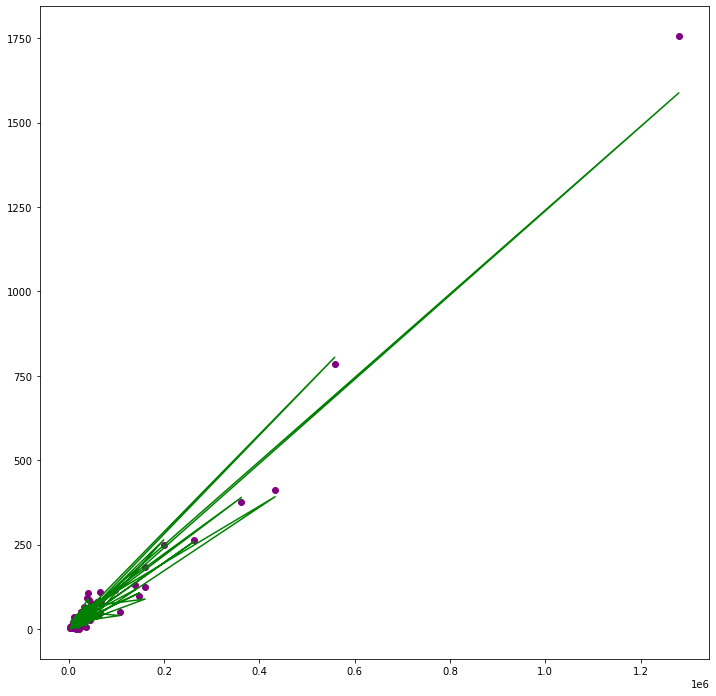

In [702]:
fig, ax = plt.subplots(figsize=(12,12))
y_pred = lr.predict(X)
plt.scatter(X_Plot, y_pred, color='purple')
plt.plot(compiledcountydata["Population"],compiledcountydata["Total Deaths"], color='green')
plt.show()

## Summary of Models
### LR Prediction

In [703]:
print(f'My R-squared value is {lr.score(X_test, y_test)}')
print(f'My slope coefficients are {lr.coef_}')
print(f'My intercept is {lr.intercept_}')

My R-squared value is 0.986827012063956
My slope coefficients are [-1.66075282e-03  2.33790377e-04  1.57271751e+02  5.67372304e-03
  2.77376277e-01 -3.44067851e+00 -6.87841295e-01]
My intercept is 0.0


### LR Prediction:

In [704]:
predictions = lr.predict(X_test)
printMetrics(y_test, predictions)

Score: 0.99
Mean Absolute Error: 17.48
Mean Squared Error: 40.80
r2: 0.99
Reg Fit: 0.99


### Ridge Prediction:

In [705]:
predictions = rr.predict(X_test)
printMetrics(y_test, predictions)

Score: 0.99
Mean Absolute Error: 17.07
Mean Squared Error: 33.51
r2: 0.99
Reg Fit: 0.99


### Lasso Prediction:

In [706]:
predictions = lassoModel.predict(X_test)
printMetrics(y_test, predictions)

Score: 0.99
Mean Absolute Error: 16.88
Mean Squared Error: 32.67
r2: 0.99
Reg Fit: 0.99


## Analysis:
Based on the above predictive values, all regression models produces the same score and R2, and Regression Fit.
However, the Mean Absolute Error and Mean Squared Errors are different.